<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/pca/ejem-pres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firstly, * is not dot product for numpy array. It is element-wise multiplication. To perform dot product, you need to use np.dot.

Secondly, the shape of PCA.components_ is (n_components, n_features) while the shape of data to transform is (n_samples, n_features), so you need to transpose PCA.components_ to perform dot product.

Moreover, the first step of transform is to subtract the mean, therefore if you do it manually, you also need to subtract the mean at first.

The correct way to transform is

data_reduced = np.dot(data - pca.mean_, pca.components_.T)
2) inverse_transform is just the inverse process of transform

data_original = np.dot(data_reduced, pca.components_) + pca.mean_
If your data already has zero mean in each column, you can ignore the pca.mean_ above, for example

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(data)

data_reduced = np.dot(data, pca.components_.T) # transform
data_original = np.dot(data_reduced, pca.components_) # inverse_transform

https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com

PCA computes eigenvectors of the covariance matrix ("principal axes") and sorts them by their eigenvalues (amount of explained variance). The centered data can then be projected onto these principal axes to yield principal components ("scores"). For the purposes of dimensionality reduction, one can keep only a subset of principal components and discard the rest. (See here for a layman's introduction to PCA.)

Let Xraw
 be the n×p
 data matrix with n
 rows (data points) and p
 columns (variables, or features). After subtracting the mean vector μ
 from each row, we get the centered data matrix X
. Let V
 be the p×k
 matrix of some k
 eigenvectors that we want to use; these would most often be the k
 eigenvectors with the largest eigenvalues. Then the n×k
 matrix of PCA projections ("scores") will be simply given by Z=XV
.

This is illustrated on the figure below: the first subplot shows some centered data (the same data that I use in my animations in the linked thread) and its projections on the first principal axis. The second subplot shows only the values of this projection; the dimensionality has been reduced from two to one:

In order to be able to reconstruct the original two variables from this one principal component, we can map it back to p
 dimensions with V⊤
. Indeed, the values of each PC should be placed on the same vector as was used for projection; compare subplots 1 and 3. The result is then given by X^=ZV⊤=XVV⊤
. I am displaying it on the third subplot above. To get the final reconstruction X^raw
, we need to add the mean vector μ
 to that:

PCA reconstruction=PC scores⋅Eigenvectors⊤+Mean

Note that one can go directly from the first subplot to the third one by multiplying X
 with the VV⊤
 matrix; it is called a projection matrix. If all p
 eigenvectors are used, then VV⊤
 is the identity matrix (no dimensionality reduction is performed, hence "reconstruction" is perfect). If only a subset of eigenvectors is used, it is not identity.

This works for an arbitrary point z
 in the PC space; it can be mapped to the original space via x^=zV⊤
.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

x = [19,39,30,30,15,15,15,30]
y= [63,74,87,23,35,43,32,73]
media_x =  np.mean(x)
media_y = np.mean(y)
data1 =np.stack ((x, y), axis=1)
mean_col = np.mean(data1, axis=0)
data1 = data1 - mean_col
print(data1.shape)
print("originales",data1)
pca = PCA(n_components=2)
pca.fit(data1)
print("vectires",pca.components_)
pca_data1 = pca.transform(data1)
print(pca.inverse_transform(pca_data1))

(8, 2)
originales [[ -5.125   9.25 ]
 [ 14.875  20.25 ]
 [  5.875  33.25 ]
 [  5.875 -30.75 ]
 [ -9.125 -18.75 ]
 [ -9.125 -10.75 ]
 [ -9.125 -21.75 ]
 [  5.875  19.25 ]]
vectires [[ 0.23806218  0.97124992]
 [ 0.97124992 -0.23806218]]
[[ -5.125   9.25 ]
 [ 14.875  20.25 ]
 [  5.875  33.25 ]
 [  5.875 -30.75 ]
 [ -9.125 -18.75 ]
 [ -9.125 -10.75 ]
 [ -9.125 -21.75 ]
 [  5.875  19.25 ]]


In [ ]:
data_reduced = np.dot(data1, pca.components_.T)
data_reduced.shape

(8, 2)

In [ ]:
pca.components_.shape

(2, 2)

In [ ]:
data_original = np.dot(data_reduced, pca.components_)
data_original

array([[ -5.125,   9.25 ],
       [ 14.875,  20.25 ],
       [  5.875,  33.25 ],
       [  5.875, -30.75 ],
       [ -9.125, -18.75 ],
       [ -9.125, -10.75 ],
       [ -9.125, -21.75 ],
       [  5.875,  19.25 ]])

In [ ]:
data_original[:,0] = data_original[:,0] + media_x
data_original[:,1] = data_original[:,1] + media_y
data_original

array([[19., 63.],
       [39., 74.],
       [30., 87.],
       [30., 23.],
       [15., 35.],
       [15., 43.],
       [15., 32.],
       [30., 73.]])

In [ ]:
data_orig = np.dot(data_reduced, pca.components_)+ mean_col
data_orig

array([[19., 63.],
       [39., 74.],
       [30., 87.],
       [30., 23.],
       [15., 35.],
       [15., 43.],
       [15., 32.],
       [30., 73.]])

In [ ]:
import numpy as np
data_multi = np.array([[10, 15, 20, 25], [40, 45, 50, 55], [57, 58, 59, 60]])
data_multi

array([[10, 15, 20, 25],
       [40, 45, 50, 55],
       [57, 58, 59, 60]])

In [ ]:
mean_col = np.mean(data_multi, axis=0)
std_dev_col = np.std(data_multi, axis=0)
z_scores_multi = (data_multi - mean_col) / std_dev_col
print(z_scores_multi)

[[-1.32092767 -1.35138849 -1.37944833 -1.40182605]
 [ 0.22301376  0.31470691  0.4198321   0.53916387]
 [ 1.09791391  1.03668158  0.95961623  0.86266219]]


In [ ]:
mean_col

array([35.66666667, 39.33333333, 43.        , 46.66666667])

In [ ]:
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas



In [ ]:
x = [19,39,30,30,15,15,15,30]
y= [63,74,87,23,35,43,32,73]
media_x =  np.mean(x)
media_y = np.mean(y)
datosorig =np.stack ((x, y), axis=0)
datosorig

array([[19, 39, 30, 30, 15, 15, 15, 30],
       [63, 74, 87, 23, 35, 43, 32, 73]])

In [ ]:
datosorig.shape

(2, 8)

In [ ]:
datosorig.mean(axis=1)

array([24.125, 53.75 ])

In [ ]:
datos = datosorig - datosorig.mean(axis=1)[:, np.newaxis]
datos

array([[ -5.125,  14.875,   5.875,   5.875,  -9.125,  -9.125,  -9.125,
          5.875],
       [  9.25 ,  20.25 ,  33.25 , -30.75 , -18.75 , -10.75 , -21.75 ,
         19.25 ]])

In [ ]:
A=np.cov(datos)

In [ ]:
autovalor, autovector = np.linalg.eig(A )
autovalor

array([ 56.10230167, 580.80841262])

In [ ]:
autovector

array([[-0.97124992, -0.23806218],
       [ 0.23806218, -0.97124992]])

In [ ]:
autovector[1]

array([ 0.23806218, -0.97124992])

In [ ]:
autovector[1].shape

(2,)

In [ ]:
autovector[1].T.shape

(2,)

In [ ]:
proj = np.dot(autovector[1].T,datos)
proj

array([-10.20413038, -16.12663594, -30.89544444,  31.26455022,
        16.03861858,   8.26861925,  18.95236833, -17.29794561])

In [ ]:
proj.shape

(8,)

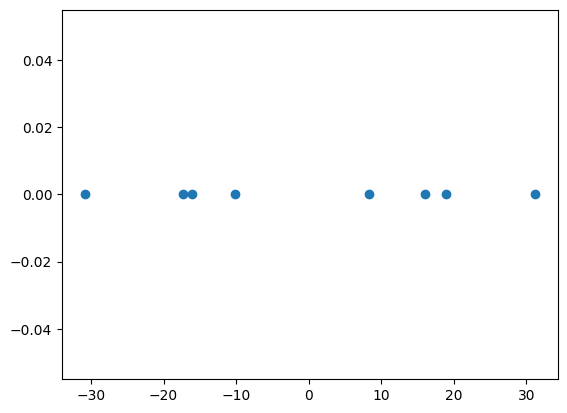

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(proj, [0,0,0,0,0,0,0,0])

plt.show()

RetrievedRowData=(RowFeatureVectorT x FinalData)+OriginalMean

In [ ]:
autovector

array([[-0.97124992, -0.23806218],
       [ 0.23806218, -0.97124992]])

In [ ]:
autovector.shape

(2, 2)

In [ ]:
proj1 = np.dot(autovector.T,datos)
proj1

array([[  7.17973095,  -9.62658345,   2.20947409, -13.02650517,
          4.39898969,   6.3034871 ,   3.68480316,  -1.12339637],
       [ -7.76399308, -23.20898568, -33.69267501,  28.46731965,
         20.38325329,  12.61325396,  23.29700304, -20.09517618]])

In [ ]:
datosor1 =  np.dot(autovector,proj1)
datosor1

array([[ -5.125,  14.875,   5.875,   5.875,  -9.125,  -9.125,  -9.125,
          5.875],
       [  9.25 ,  20.25 ,  33.25 , -30.75 , -18.75 , -10.75 , -21.75 ,
         19.25 ]])

In [ ]:
24.125-8.82

15.305

In [ ]:
prueba = datosor1 + datosorig.mean(axis=1)[:, np.newaxis]

In [ ]:
prueba

array([[19., 39., 30., 30., 15., 15., 15., 30.],
       [63., 74., 87., 23., 35., 43., 32., 73.]])

In [ ]:
datosorig.mean(axis=1)

array([24.125, 53.75 ])

In [ ]:
datosorig

array([[19, 39, 30, 30, 15, 15, 15, 30],
       [63, 74, 87, 23, 35, 43, 32, 73]])

In [ ]:
x1 = [19.,39.,30.,30.,15.,15.,15.,30.]
x2 =  [63.,74.,87.,23.,35.,43.,32.,73.]
N=np.size(x1)
X = np.column_stack([x1, x2])
X -= X.mean(axis=0)
fact = N-1
by_hand = np.dot(X.T, X.conj()) / fact
print(by_hand)

[[ 85.83928571 121.32142857]
 [121.32142857 551.07142857]]


In [ ]:
autovalor, autovector = np.linalg.eig(by_hand )
autovalor

array([ 56.10230167, 580.80841262])

In [ ]:
autovector

array([[-0.97124992, -0.23806218],
       [ 0.23806218, -0.97124992]])

In [ ]:
W

In [ ]:
autovalor, autovector = np.linalg.eig(A)

In [ ]:
autovalor

array([ 56.10230167, 580.80841262])

In [ ]:
autovector

array([[-0.97124992, -0.23806218],
       [ 0.23806218, -0.97124992]])

In [ ]:
x = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.2]
y= [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
datos = np.stack((x, y), axis=0)
datos

array([[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2. , 1. , 1.5, 1.2],
       [2.4, 0.7, 2.9, 2.2, 3. , 2.7, 1.6, 1.1, 1.6, 0.9]])

In [ ]:
b1 = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.2]
b2 =  [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
N=np.size(b1)
X = np.column_stack([b1, b2])
X -= X.mean(axis=0)
fact = N-1
by_hand = np.dot(X.T, X.conj()) / fact
print(by_hand)

[[0.60177778 0.60422222]
 [0.60422222 0.71655556]]


In [ ]:
Z = np.cov(x,y)
Z

array([[0.60177778, 0.60422222],
       [0.60422222, 0.71655556]])

In [ ]:
A=np.cov(datos)
A

array([[0.60177778, 0.60422222],
       [0.60422222, 0.71655556]])

In [ ]:
autovalor, autovector = np.linalg.eig(A)

In [ ]:
autovalor

array([0.04702256, 1.13951381])

In [ ]:
data_reduced = np.dot(data - pca.mean_, pca.components_.T)

In [ ]:
data_original = np.dot(data_reduced, pca.components_) + pca.mean_

If your data already has zero mean in each column, you can ignore the pca.mean_ above, for example

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(data)

data_reduced = np.dot(data, pca.components_.T) # transform
data_original = np.dot(data_reduced, pca.components_) # inverse_transform

For doing it manually, and truncating dimensions, data_reduced = np.dot(data, pca.components_.T[:,:dim]), and back data_original = np.dot(data_reduced, pca.components_[:dim, :])

https://github.com/scikit-learn/scikit-learn/blob/a95203b/sklearn/decomposition/pca.py#L99

For doing it manually, and truncating dimensions, data_reduced = np.dot(data, pca.components_.T[:,:dim]), and back data_original = np.dot(data_reduced, pca.components_[:dim, :]) –
Gulzar
 CommentedNov 30, 2019 at 20:38

Secondly, the shape of PCA.components_ is (n_components, n_features) while the shape of data to transform is (n_samples, n_features), so you need to transpose PCA.components_ to perform dot product.

Moreover, the first step of transform is to subtract the mean, therefore if you do it manually, you also need to subtract the mean at first.

The correct way to transform is

data_reduced = np.dot(data - pca.mean_, pca.components_.T)
2) inverse_transform is just the inverse process of transform

data_original = np.dot(data_reduced, pca.components_) + pca.mean_

For doing it manually, and truncating dimensions, data_reduced = np.dot(data, pca.components_.T[:,:dim]), and back data_original = np.dot(data_reduced, pca.components_[:dim, :]) –
Gulzar
 CommentedNov 30, 2019 at 20:38

In [ ]:
from numpy.random import rand
from sklearn.decomposition import PCA

# PCA transform
data = rand(100, 10)
n_dim = data.shape[1]
pca = PCA(n_dim)
transformed = pca.fit_transform(data)

# Inverse PCA
def inverse_pca(pca_data, pca, remove_n):
    transformed = pca_data.copy()
    transformed[:, -remove_n:] = 0
    return pca.inverse_transform(transformed)



In [ ]:
new_data = inverse_pca(transformed, pca, 1)

In [ ]:
new_data[:3]

array([[0.3942601 , 0.33713574, 0.69003481, 0.56520431, 0.10216222,
        0.92370359, 0.2015573 , 0.56920371, 0.56958712, 0.52273329],
       [0.69151678, 0.79737433, 0.56579425, 0.75676493, 0.50322428,
        0.7989385 , 0.41863082, 0.07946876, 0.53686306, 0.86224734],
       [0.86731551, 0.29366595, 0.84019149, 0.18898075, 0.72960807,
        0.8356996 , 0.3629377 , 0.67810949, 0.70128004, 0.79610863]])

In [ ]:
data[:3]

array([[0.39511145, 0.30805767, 0.61395804, 0.47224143, 0.06082482,
        0.94154012, 0.20102868, 0.53002582, 0.50350177, 0.57885943],
       [0.69047081, 0.83309982, 0.65926261, 0.87097967, 0.55401165,
        0.77702443, 0.41928029, 0.12760294, 0.6180559 , 0.79329043],
       [0.86844285, 0.25516158, 0.73945278, 0.06588194, 0.67487025,
        0.85931823, 0.36223772, 0.62623124, 0.61377169, 0.87042928]])

In [ ]:
autovector

array([[-0.73977066, -0.67285911],
       [ 0.67285911, -0.73977066]])

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

iris = datasets.load_iris()
data = iris.data
pd.options.display.float_format = '{:,.4f}'.format
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
columns= iris['feature_names'] + ['target'])
data1 = data1.iloc[:,0:4]
print(data1.shape)
samples = pd.DataFrame(data1.loc[[0,1,2]], columns = data1.keys()).reset_index(drop = True)
print(samples)
pca = PCA(n_components=2)
pca.fit(data1)
pca_data1 = pca.transform(data1)
pca_samples = pca.transform(samples)
print(pca.inverse_transform(pca_samples))

(150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             5.1000            3.5000             1.4000            0.2000
1             4.9000            3.0000             1.4000            0.2000
2             4.7000            3.2000             1.3000            0.2000
[[5.08303897 3.51741393 1.40321372 0.21353169]
 [4.7462619  3.15749994 1.46356177 0.24024592]
 [4.70411871 3.1956816  1.30821697 0.17518015]]


In [ ]:
print(data1.shape)

(150, 4)


In [21]:
from sklearn.datasets import load_iris
X=load_iris()
X = iris.data
X.shape
print (X[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
print (X_std[0:5])
print ("The shape of Feature Matrix is -",X_std.shape)

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
The shape of Feature Matrix is - (150, 4)


In [23]:
X_covariance_matrix = np.cov(X_std.T)
X_covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [24]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [25]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.938085050199995
0.9201649041624864
0.1477418210449475
0.020853862176462696


In [26]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print(40 * '-')
print("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [np.float64(72.96244541329989), np.float64(22.850761786701753), np.float64(3.668921889282865), np.float64(0.5178709107154905)]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.96244541  95.8132072   99.48212909 100.        ]


In [27]:
Y = np.dot(X_std,eig_vecs.T)
print(Y[0:5])

[[-0.23323008 -0.86330304  0.31605611 -2.11580183]
 [ 0.0748986   0.26466784  0.20359071 -2.17563762]
 [-0.18423663 -0.10902903  0.043582   -2.37939263]
 [-0.24228936  0.16392697 -0.00495133 -2.3603244 ]
 [-0.38324685 -1.04320646  0.2400908  -2.19965413]]


In [28]:
#####EXCEtENTE

orig=np.dot(Y,eig_vecs)
print(orig[0:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [33]:
inversa = scaler.inverse_transform(X_std)
print(inversa[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
y_new_inverse = scalery.inverse_transform(y_new)


In [ ]:
import numpy as np
#Original dataset X
X=np.array([[11,2,25],[12,20, 31],[5,6,7],[200,10,22]])

#Get covariance matrix from X, if using numpy.cov,
#make sure set parameter rowvar to False

covX=np.cov(X, rowvar=False)

#Get eigenvalues and eigenvectors from covX
eigenvals, eigenvecs = np.linalg.eig(covX)

#pair the eigenvalue and corresponding eigenvector
pair = [(i[0], i[1]) for i in zip(eigenvals, eigenvecs)]
#Sort the eigenvectors by its eigenvalues in descending order
sortedPair=[[i[0], i[1]] for i in sorted(pair, key=lambda x: abs(x[0]), reverse=True)]

#Get sorted eigenvectors, keep the sort order.
W=np.array([i[1] for i in sortedPair])

def findTopPrincipalComponentNumber(eigenvals:list,threshold:int=0.80) -> (int, float):
        ''' findTopPrincipalComponentNumber will return k number that will meet the threshold'''
        total = sum(eigenvals)
        #Sort the Eigenvalues in descending order,
        #calculate each eiganvalue that contains percentage of information in raw dataset
        eachPercentList = [(i / total) for i in sorted(eigenvals, reverse=True)]
        cumulativePercept=0
        cumulativePerceptList=[]
        for i in eachPercentList:
            cumulativePercept+=i
            cumulativePerceptList.append(cumulativePercept)
            if cumulativePercept >= threshold:
                break
        return (len(cumulativePerceptList), float(cumulativePerceptList[-1]))
#get the k to have 95% of the original information from raw dataset
bestK, coveredPercentage = findTopPrincipalComponentNumber(eigenvals, 0.95)

#pca projected dataset is X times W
Z=np.matmul(X, W)

#Get bestK columns from Z, to created dimension reduced dataset pcaZ
#that has 98% of the information from original X
pcaZ=[]
for i in Z.tolist():
    subZ=[]
    for j in range(bestK):
        subZ.append(i[j])
    pcaZ.append(subZ)

#To reconstruct, can not use pcaZ, need to use Z
#Since Z = X times W, then X = Z times inversed(W)
restoredX = np.matmul(Z, np.linalg.inv(W))

#Restored original dataset, that should match original raw dataset X
restoredX

'''
array([[ 11.,   2.,  25.],
       [ 12.,  20.,  31.],
       [  5.,   6.,   7.],
       [200.,  10.,  22.]])
'''

#Original raw dataset
X

'''
array([[ 11,   2,  25],
       [ 12,  20,  31],
       [  5,   6,   7],
       [200,  10,  22]])
'''

'\narray([[ 11,   2,  25],\n       [ 12,  20,  31],\n       [  5,   6,   7],\n       [200,  10,  22]])\n'

In [ ]:
import numpy as np
import sklearn.datasets, sklearn.decomposition

X = sklearn.datasets.load_iris().data
mu = np.mean(X, axis=0)

pca = sklearn.decomposition.PCA()
pca.fit(X)

nComp = 2
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

print(Xhat[0,])

[5.08303897 3.51741393 1.40321372 0.21353169]
